# Project 2 - Dimensionality Reduction

In this project, you will work with a ships in satellite imagery dataset. You will implement dimensionality reduction and manifold learning techniques for visualization and subsequent classification tasks to report on a set of questions.

The goal of this project includes:

1. Dataset visualization and interpretability via dimensionality reduction
2. Implement dimensionality reduction techniques with ```scikit-learn```
3. Carry out experiments to select best subspace projections
4. Design pipelines for hyperparameter tuning and model selection
5. Implement performance evaluation metrics and evaluate results
6. Report observations, propose business-centric solutions and propose mitigating strategies

## Deliverables

As part of this project, you should deliver the following materials:

1. [**4-page IEEE-format paper**](https://www.ieee.org/conferences/publishing/templates.html). Write a paper with no more than 4 pages addressing the questions posed below. When writing this report, consider a business-oriented person as your reader (e.g. your PhD advisor, your internship manager, etc.). Tell *the story* for each datasets' goal and propose solutions by addressing (at least) the questions posed below.

2. **Python Code**. Create two separate Notebooks: (1) "training.ipynb" used for training and hyperparameter tuning, (2) "test.ipynb" for evaluating the final trained model in the test set. The "test.ipynb" should load all trained objects and simply evaluate the performance. So don't forget to **push the trained models** to your repository to allow us to run it.

All of your code should run without any errors and be well-documented. 

3. **README.md file**. Edit the readme.md file in your repository and how to use your code. If there are user-defined parameters, your readme.md file must clearly indicate so and demonstrate how to use your code. **Consider the case where the user wants to utilize your code to run on a different test set. Indicate in your readme.md file how this can be achieved.**

This is an **individual assignment**. 

Late submissions will not be accepted, so please plan accordingly.

---

# About the Dataset

Satellite imagery provides unique insights into various markets, including agriculture, defense and intelligence, energy, and finance. New commercial imagery providers, such as [Planet](https://www.planet.com/), are using constellations of small satellites to capture images of the entire Earth every day.

This flood of new imagery is outgrowing the ability for organizations to manually look at each image that gets captured, and there is a need for machine learning and computer vision algorithms to help automate the analysis process.

The aim of this dataset is to help address the difficult task of detecting the location of large ships in satellite images. Automating this process can be applied to many issues including monitoring port activity levels and supply chain analysis.

### Content

The dataset consists of images extracted from Planet satellite imagery collected over the San Francisco Bay and San Pedro Bay areas of California. It includes 4000 $80\times 80$ RGB images labeled with either a "ship" or "no-ship" classification. Images were derived from PlanetScope full-frame visual scene products, which are orthorectified to a 3-meter pixel size.

* ```ship_data.npy```: contains all 4000 $80\times 80$ RGB images.
* ```ship_labels.npy```: valued 1 or 0, representing the "ship" class and "no-ship" class, respectively.

In [1]:
import numpy as np
import numpy.random as npr
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('bmh')

X = np.load('ships_dataset/ship_data.npy')
t = np.load('ships_dataset/ship_labels.npy')

label_names = ['no_ship', 'ship']

X.shape, t.shape

((4000, 80, 80, 3), (4000,))

### Labels

The "ship" class includes 1000 images. Images in this class are centered on the body of a single ship. Ships of different sizes, orientations, and atmospheric collection conditions are included. Example images from this class are shown below.

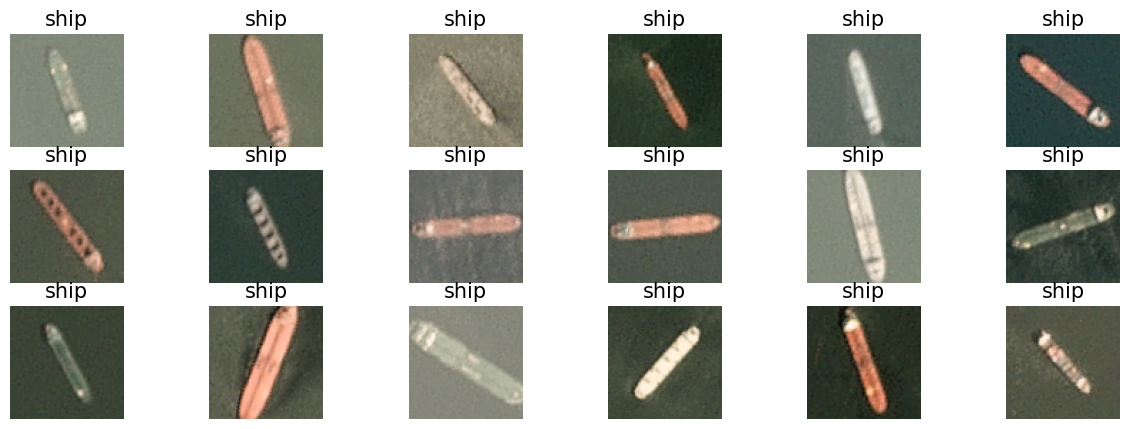

In [2]:
# ship images

rnd_sample = npr.permutation(np.where(t==1)[0])
fig=plt.figure(figsize=(15,5))
for j in range(18):
    fig.add_subplot(3,6,j+1)
    plt.imshow(X[rnd_sample[j]])
    plt.axis('off');plt.title(label_names[t[rnd_sample[j]]],size=15)
plt.show()
print('\n\n')

The "no-ship" class includes 3000 images. A third of these are a random sampling of different land cover features - water, vegetation, bare earth, buildings, etc. - that do not include any portion of a ship. The next third are "partial ships" that contain only a portion of a ship, but not enough to meet the full definition of the "ship" class. The last third are images that have previously been mislabeled by machine learning models, typically caused by bright pixels or strong linear features. Example images from this class are shown below.

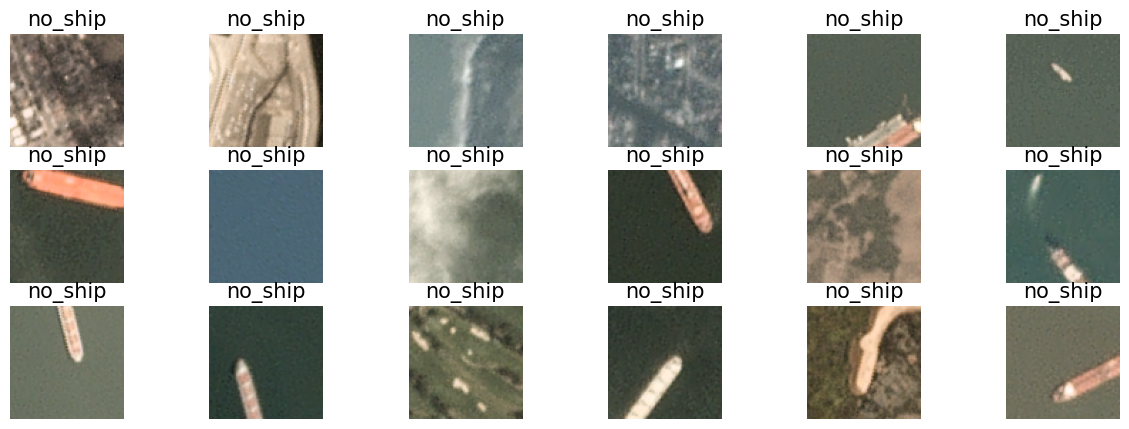

In [3]:
# no_ship images

rnd_sample = npr.permutation(np.where(t==0)[0])
fig=plt.figure(figsize=(15,5))
for j in range(18):
    fig.add_subplot(3,6,j+1)
    plt.imshow(X[rnd_sample[j]])
    plt.axis('off');plt.title(label_names[t[rnd_sample[j]]],size=15)
plt.show()
print('\n\n')

### Scenes

Eight full-scene images are included in the "**scenes**" directory. Scenes can be used to visualize the performance of classification models trained on the dataset. Verify a model's accuracy by applying it across a scene and viewing where 'ship' classifications occur - the context provided by the scene helps determine positive hits from false alarms. An example scene is shown below.

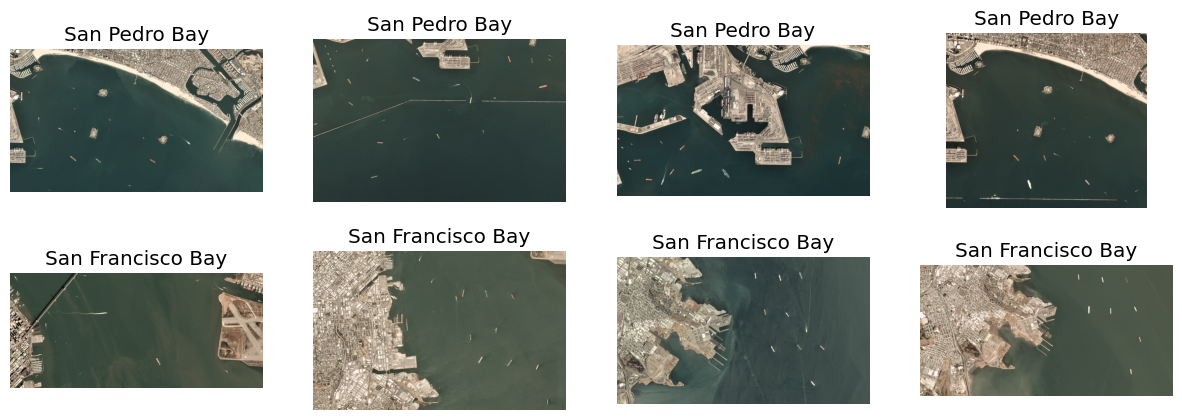

In [4]:
import os
from PIL import Image
bay_name = ['San Pedro Bay']*4 + ['San Francisco Bay']*4

directory = 'ships_dataset/scenes/'
plt.figure(figsize=(15,5))
j=1
for file in os.listdir(directory):
    if file.endswith('.png'):
        filename = directory+'/'+file
        # Loads image
        image = np.array(Image.open(filename).convert('RGB'))
        plt.subplot(2,4,j); plt.imshow(image); plt.axis('off');plt.title(bay_name[j-1])
        j+=1

---

# Assignment

1. Train at least two classifiers without dimensionality reduction on this dataset.
    * Carry the standard hyperparameter tuning.
    * Report performance measures (accuracy score and f1-score), and training time.

2. Train a ```pipeline``` to perform dimensionality reduction with Principal Component Analysis (PCA). Answer the following questions:
    * How many components are needed to explain 90% of the variance?
    * Visualize examples of "ship" and "no_ship" image reconstructions. What is the average RMSE of the reconstruction as a function of number of components preserved?

3. Train a ```pipeline``` for the same classifiers in part (1) with dimensionality reduction via PCA.
    * Carry the standard hyperparameter tuning (including ```n_components```).
    * Compare performance measures and training time.

4. Repeat question (3) for using manifold learning algorithms. Utilize the new lower-dimensional feature space to build a classifier.
    * Use the same classifiers.
    * Compare performance metrics and training/inference time with those for question (3) and (1).
    * Visualize and interpret what the first 2 dimensions in the manifold learning algorithms you train. Use the ```plot_components``` function presented in lecture.

5. What is the overall best ```pipeline```?
    * Report the confusion matrices.
    * Visualize misclassified samples. Do you see a pattern? Provide a discussion on how you would move forward to address the misclassifications.

---

### Test Function

6. Report performance and inference time on your test set for questions 1, 3 and 4.

7. Create a function that loads one satellite image (examples inside the ```scene``` folder), runs your best model across a scene and displays where a "ship" classification occurs.

---

# Submit Your Solution

Confirm that you've successfully completed the assignment.

Along with the Notebook, include a PDF of the notebook with your solutions.

```add``` and ```commit``` the final version of your work, and ```push``` your code to your GitHub repository.

Submit the URL of your GitHub Repository as your assignment submission on Canvas.

---